In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression

In [2]:
pd.set_option('display.max_rows',50)  # show many rows or coulumns as we want in other 

In [3]:
mydata=pd.read_csv("https://raw.githubusercontent.com/Premalatha-success/Yhills_July12_Analytics/main/pima-indians-diabetes-2.csv")

In [4]:
mydata.isnull().sum()

Preg     0
Plas     0
Pres     0
skin     0
test     0
mass     0
pedi     0
age      0
class    0
dtype: int64

In [5]:
mydata.dtypes

Preg       int64
Plas       int64
Pres       int64
skin       int64
test       int64
mass     float64
pedi     float64
age        int64
class      int64
dtype: object

In [6]:
mydata.head()  #missing value can be zero 

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
mydata['class'].value_counts()

0    500
1    268
Name: class, dtype: int64

In [8]:
median1=mydata['skin'].median()
median1

23.0

In [9]:
mydata['skin']=mydata['skin'].replace(to_replace=0,value=np.nan)
mydata['skin']=mydata['skin'].astype(float)

In [10]:
mydata['skin'].replace(np.nan,median1,inplace=True)

In [11]:
median2=mydata['test'].median()
median2

30.5

In [12]:
mydata['test']=mydata['test'].replace(to_replace=0,value=np.nan)
mydata['test']=mydata['test'].astype(float)

In [13]:
mydata['test'].replace(np.nan,median2,inplace=True)

In [14]:
mydata.head()

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
0,6,148,72,35.0,30.5,33.6,0.627,50,1
1,1,85,66,29.0,30.5,26.6,0.351,31,0
2,8,183,64,23.0,30.5,23.3,0.672,32,1
3,1,89,66,23.0,94.0,28.1,0.167,21,0
4,0,137,40,35.0,168.0,43.1,2.288,33,1


In [15]:
X=mydata.drop(['class'],axis=1)   # drop depending variable
y=mydata['class']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30,random_state=1)

In [17]:
reg_model=LogisticRegression()
reg_model.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [18]:
reg_model.score(X_train, y_train)

0.776536312849162

In [19]:
reg_model.score(X_test, y_test)

0.7835497835497836

In [20]:
mydata.columns

Index(['Preg', 'Plas', 'Pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class'], dtype='object')

### Fit the model

In [21]:
model=LogisticRegression()
model.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [22]:
predictions=model.predict(X_test)

In [23]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions)

0.7835497835497836

In [24]:
from sklearn import metrics
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       146
           1       0.78      0.58      0.66        85

    accuracy                           0.78       231
   macro avg       0.78      0.74      0.75       231
weighted avg       0.78      0.78      0.78       231



In [25]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,predictions)

array([[132,  14],
       [ 36,  49]], dtype=int64)

<AxesSubplot:>

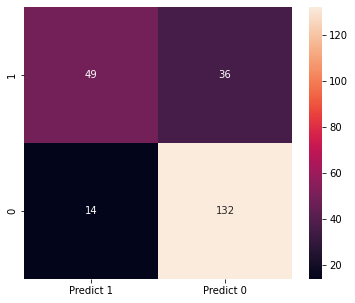

In [26]:
cm=metrics.confusion_matrix(y_test,predictions,labels=[1,0])
df_cm=pd.DataFrame(cm,index=[i for i in ['1','0']],
                  columns=[i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize=(6,5))
sns.heatmap(df_cm,annot=True,fmt='g')

In [27]:
# what should be we reduced FP or FN both are wrong entry here . it change wrt to conditions    

In [28]:
from sklearn.svm import SVC

In [29]:
clf=SVC(kernel='linear',C=1,gamma='auto')   # kernel for dimension for which good score 
clf.fit(X_train,y_train)   # by shift+tab we can check for differen kernel
# c for regulation-allowed mistake
# gamma 
#tweaking the hyperparameter (c,gamma,kernel)=best combo

SVC(C=1, gamma='auto', kernel='linear')

In [30]:
clf.score(X_train,y_train)    # svm better than LR

0.7802607076350093

In [31]:
clf.score(X_test,y_test)

0.7922077922077922

In [32]:
from sklearn.neighbors import KNeighborsClassifier

In [33]:
knn=KNeighborsClassifier(n_neighbors=5,p=1)  #p=1 manhartan p=2 euclidian

In [34]:
knn.fit(X_train,y_train)

KNeighborsClassifier(p=1)

In [35]:
knn.score(X_train,y_train) 

0.7988826815642458

In [36]:
knn.score(X_test,y_test) 

0.7748917748917749

In [37]:
from sklearn.tree import DecisionTreeClassifier

In [38]:
dtree=DecisionTreeClassifier(max_depth=4,criterion='entropy')
dtree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [39]:
dtree.score(X_train,y_train)

0.7858472998137802

In [40]:
dtree.score(X_test,y_test)

0.7922077922077922